# Credit Card Fraud Detection

In [1]:
#import the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#datsaset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Number of Rows and Columns
df.shape

(284807, 31)

In [7]:
# describing the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#Checking the Null values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
df = df.drop(['Time'],axis=1)

In [13]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
df.shape

(284807, 30)

# Correlation

<Axes: >

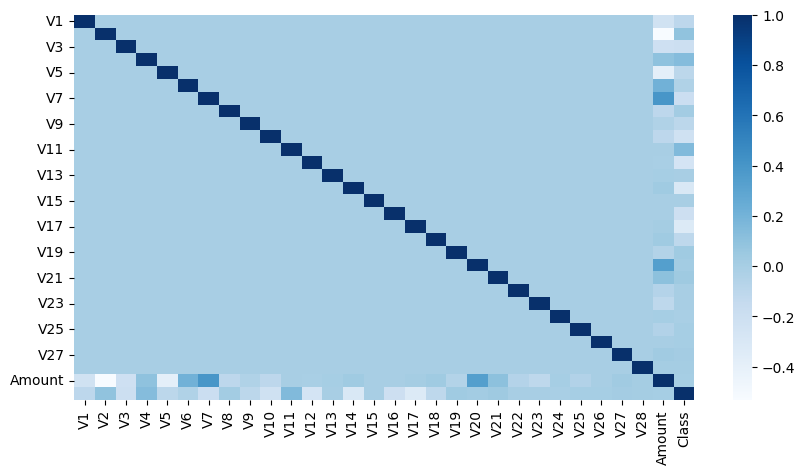

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="Blues")

In [16]:
df.duplicated().any()

True

In [17]:
#Duplicated Values dropped
df = df.drop_duplicates()

In [18]:
df.shape

(275663, 30)

#  Imbalanced Dataset

In [19]:
#This is a imbalanced Dataset
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

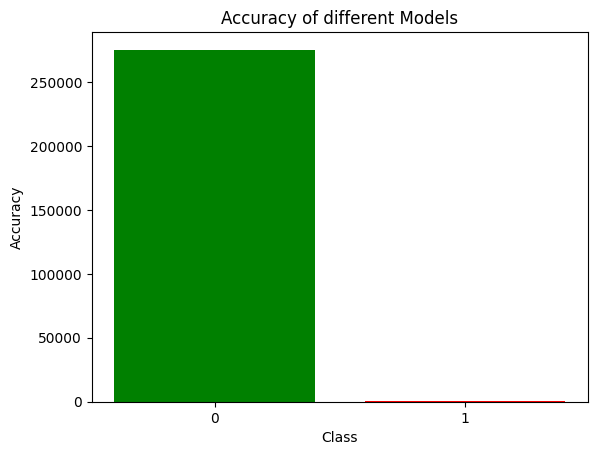

In [20]:
values=(275190,473)
labels=('0','1')
plt.bar(labels,values,color=('green','red'))
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy of different Models')
plt.show()

# Store Feature Matrix In X And Target In Vector y

In [21]:
X = df.drop('Class',axis=1)
y = df['Class']

# Splitting The Dataset 

In [22]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# Handling Imbalanced Dataset

# 1. Undersampling

In [23]:
genuine = df[df['Class']==0]
fraud = df[df['Class']==1]

In [24]:
genuine.shape

(275190, 30)

In [25]:
fraud.shape

(473, 30)

In [26]:
genuine_sample=genuine.sample(n=473)

In [27]:
genuine_sample.shape

(473, 30)

In [28]:
new_df = pd.concat([genuine_sample,fraud],ignore_index=True)

In [29]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.976025,-1.102664,-0.622973,-0.806012,1.178015,3.926452,-1.034153,1.015181,1.057930,-0.461329,...,-0.196079,-0.797978,-0.087912,1.085052,0.239958,0.941794,-0.059897,0.033749,0.282786,0
1,-1.947685,-1.086515,2.342266,-0.230622,1.297322,-1.325548,-0.667369,0.242006,0.008242,-0.763975,...,0.169760,-0.166887,0.099562,-0.119861,0.306686,0.338576,-0.065694,0.097926,-0.178353,0
2,1.937771,-0.616874,-0.386245,0.352387,-0.742611,-0.065733,-0.840008,0.230611,1.503907,0.046852,...,0.211416,0.744654,0.091436,-0.419444,-0.160884,-0.201504,0.028203,-0.053571,-0.299135,0
3,1.263203,1.282391,-1.950877,1.393927,1.496758,-0.863871,0.731161,-0.236288,-0.504171,-1.614935,...,-0.229218,-0.485472,-0.291819,-1.071351,0.921289,-0.215018,0.060049,0.086710,-0.347232,0
4,2.193767,-1.463340,-1.211934,-1.889205,-0.392260,1.029146,-1.326722,0.280636,-1.500689,1.615286,...,-0.080716,0.408797,0.228703,-1.641113,-0.315381,-0.048646,0.057761,-0.079779,-0.333239,0


In [31]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

#  Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred1 = log.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred1)

0.9263157894736842

In [37]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [38]:
precision_score(y_test,y_pred1)

0.94

In [39]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [40]:
f1_score(y_test,y_pred1)

0.9306930693069307

#  Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred2 = rf.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.9210526315789473

In [44]:
precision_score(y_test,y_pred2)

0.9578947368421052

In [45]:
recall_score(y_test,y_pred2)

0.8921568627450981

In [46]:
f1_score(y_test,y_pred2)

0.9238578680203046

In [47]:
final_df = pd.DataFrame({'Models':['LR','RF'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100
                    ]})

In [48]:
final_df

,Models,Accuracy
0,LR,92.631579
1,RF,92.105263


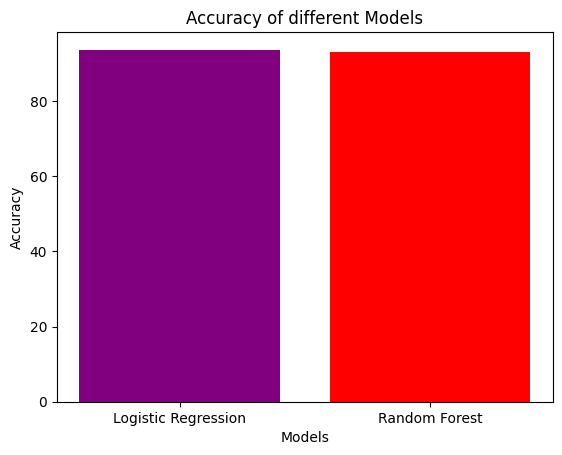

In [49]:
values=(93.68,93.15)
labels=('Logistic Regression','Random Forest')
plt.bar(labels,values,color=('purple','red'))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different Models')
plt.show()


# 2. Oversampling

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

#  Logistic Regression

In [50]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred1 = log.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred1)

0.9263157894736842

In [53]:
precision_score(y_test,y_pred1)

0.94

In [54]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [55]:
f1_score(y_test,y_pred1)

0.9306930693069307

#  Random Forest Classifier

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred2 = rf.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred2)

0.9263157894736842

In [59]:
precision_score(y_test,y_pred2)

0.9680851063829787

In [60]:
recall_score(y_test,y_pred2)

0.8921568627450981

In [61]:
f1_score(y_test,y_pred2)

0.9285714285714286

In [62]:
final_df = pd.DataFrame({'Models':['LR','RF'],
              "Accuracy":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100
                    ]})

In [63]:
final_df

,Models,Accuracy
0,LR,92.631579
1,RF,92.631579


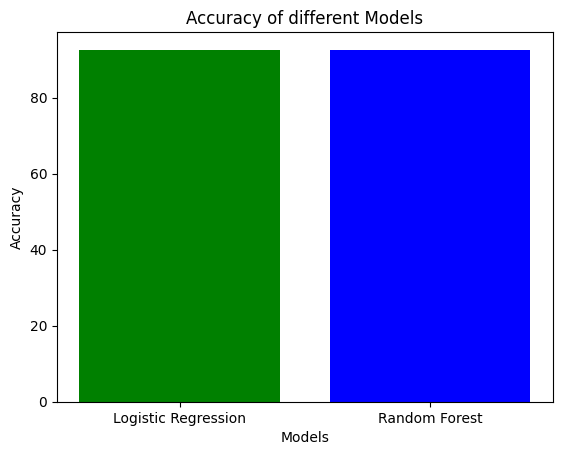

In [64]:
values=(92.63,92.63)
labels=('Logistic Regression','Random Forest')
plt.bar(labels,values,color=('green','blue'))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of different Models')
plt.show()
